<a href="https://colab.research.google.com/github/RubenCedillo123/Deep-Learning/blob/main/CedilloRuben_T02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Librerías***

* Estas son todas las librerías usadas en esta tarea

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import csv

# ***Base de Datos***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TS Astrofísica II/Práctica 2/renuncias.csv')
data

,nivel_satisfaccion,ultima_evaluacion,numero_de_proyecto,promedio_horas_mensuales,tiempo_en_la_compania,accidente_de_trabajo,renuncia,promocion_ultimos_5anios,ventas,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# ***Procesamiento de los Datos***

In [ ]:
# Separar características (X) y etiqueta (y)
X = data.drop('renuncia', axis=1)
y = data['renuncia']
# Verificar nombres reales de columnas
print("Columnas en el DataFrame:", data.columns.tolist())

# Asegurarse de que los nombres coincidan exactamente
numeric_features = ['nivel_satisfaccion', 'ultima_evaluacion', 'numero_de_proyecto',
                   'promedio_horas_mensuales', 'tiempo_en_la_compania']
categorical_features = ['accidente_de_trabajo', 'promocion_ultimos_5anios', 'ventas', 'salario']

# Separar características (X) y etiqueta (y)
X = data.drop('renuncia', axis=1)
y = data['renuncia']

# Crear transformadores
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplicar preprocesamiento
X_processed = preprocessor.fit_transform(X)

Columnas en el DataFrame: ['nivel_satisfaccion', 'ultima_evaluacion', 'numero_de_proyecto', 'promedio_horas_mensuales', 'tiempo_en_la_compania', 'accidente_de_trabajo', 'renuncia', 'promocion_ultimos_5anios', 'ventas', 'salario']


# ***Estructura de la Red Neuronal***

In [ ]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y)

# Verificar el balance de clases
print("\nDistribución de clases en y_train:", np.unique(y_train, return_counts=True))
print("Distribución de clases en y_test:", np.unique(y_test, return_counts=True))

## Construcción del modelo

# Crear modelo de red neuronal
model = Sequential([
    # Capa de entrada con 64 neuronas y activación ReLU
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    # Dropout para regularización
    Dropout(0.3),
    # Segunda capa oculta con 32 neuronas
    Dense(32, activation='relu'),
    Dropout(0.3),
    # Capa de salida con activación sigmoide (clasificación binaria)
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Mostrar resumen del modelo
model.summary()



Distribución de clases en y_train: (array([0, 1]), array([9142, 2857]))
Distribución de clases en y_test: (array([0, 1]), array([2286,  714]))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

# ***Entrenamiento del Modelo***

In [ ]:
## Entrenamiento del modelo

# Early stopping para evitar overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

## Evaluación del modelo

# Predecir en el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype(int)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8079 - loss: 0.4295 - precision: 0.7067 - recall: 0.2805 - val_accuracy: 0.9503 - val_loss: 0.1783 - val_precision: 0.8854 - val_recall: 0.9090
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9296 - loss: 0.2139 - precision: 0.8652 - recall: 0.8340 - val_accuracy: 0.9557 - val_loss: 0.1553 - val_precision: 0.9086 - val_recall: 0.9048
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9406 - loss: 0.1922 - precision: 0.8837 - recall: 0.8609 - val_accuracy: 0.9553 - val_loss: 0.1500 - val_precision: 0.9039 - val_recall: 0.9090
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9486 - loss: 0.1765 - precision: 0.9055 - recall: 0.8763 - val_accuracy: 0.9603 - val_loss: 0.1434 - val_precision: 0.9220 - val_recall: 0.9104
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9556 - loss: 0.1659 - precision: 0.9139 - recall: 0.8953 - val_accuracy: 0.9603 - val_loss

# ***Evaluación del Modelo***

In [ ]:
# Métricas de evaluación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nPrecisión (accuracy):", accuracy_score(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2286
           1       0.96      0.91      0.93       714

    accuracy                           0.97      3000
   macro avg       0.97      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000


Matriz de confusión:
[[2258   28]
 [  66  648]]

Precisión (accuracy): 0.9686666666666667


# ***Predicciones y Visualización de Resultados***

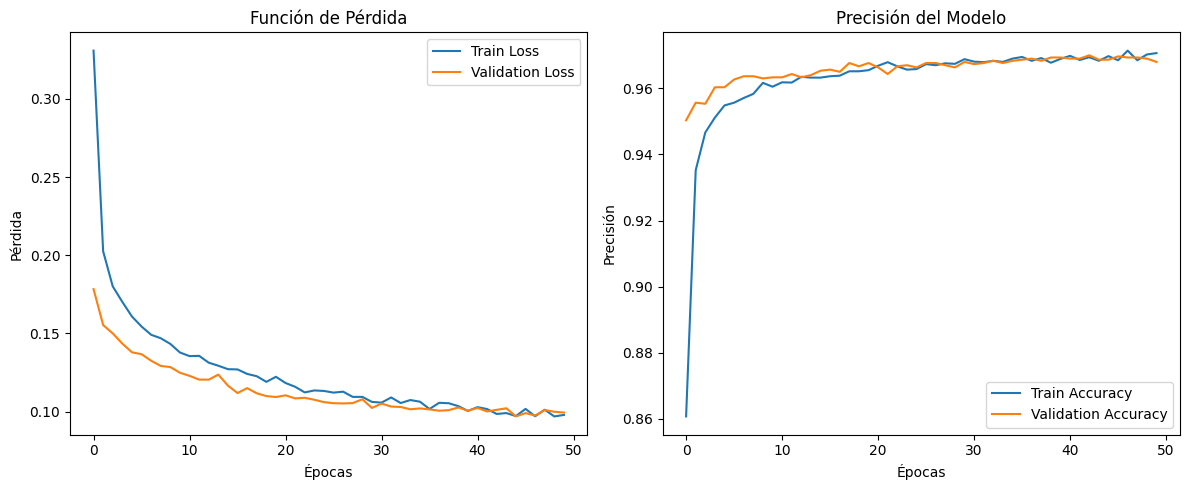

In [ ]:
## Visualización de resultados

# Gráfico de pérdida durante el entrenamiento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Función de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de precisión durante el entrenamiento
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

# ***Predicción para un Empleado Especifíco***

In [ ]:
#Ejemplo:
empleado_x = {
    'nivel_satisfaccion': 0.75,           # Valor entre 0-1
    'ultima_evaluacion': 0.85,            # Valor entre 0-1
    'numero_de_proyecto': 4,              # Número entero
    'promedio_horas_mensuales': 160,      # Horas trabajadas
    'tiempo_en_la_compania': 3,           # Años en la empresa
    'accidente_de_trabajo': 0,            # 0 (No) o 1 (Sí)
    'promocion_ultimos_5anios': 0,        # 0 (No) o 1 (Sí)
    'ventas': 'ventas',                   # Departamento (ej: 'ventas', 'tecnico')
    'salario': 'medio'                    # Nivel salarial ('bajo', 'medio', 'alto')
}
# Crear DataFrame con los datos del empleado
df_empleado = pd.DataFrame([empleado_x])

# Aplicar el mismo preprocesamiento usado en el entrenamiento
X_empleado_processed = preprocessor.transform(df_empleado)

# Predecir probabilidad de renuncia
prob_renuncia = model.predict(X_empleado_processed)[0][0]  # Ej: 0.23 (23% de probabilidad)

# Convertir a decisión binaria (usando threshold=0.5)
prediccion = "Sí" if prob_renuncia > 0.5 else "No"

print(f"\nPredicción para el empleado:")
print(f"- Probabilidad de renuncia: {prob_renuncia:.2%}")
print(f"- Predicción (threshold=0.5): {prediccion}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

Predicción para el empleado:
- Probabilidad de renuncia: 0.48%
- Predicción (threshold=0.5): No
